In [9]:
## gpsSensor in Python
# Position noise modeled as a first order Gauss-Markov process with sigma values of HorizontalPositionAccuracy and VerticalPositionAccuracy
# Velocity noise modeled as Gaussian noise with a signma value equal to VelocityAccuracy

# Overbounding the effect of uncertain Gauss-Markov noise in Kalman filtering by Langel
# Introduction to Random Signals and Applied Kalman Filtering 3rd Edition by Brown and Hwang

# GPS Assumptions:
# FOGM: The GPS position error is modeled as a first order Gauss-Markov process
# GN: The GPS velocity error is modeled as Gaussian noise

# FOGM Assumptions:
# Stationarity: The statistical properties (mean and variance) do not change over time
# Time-Correlation: The current error is directly related to the previous error
# Gaussian Driving Noise: The input noise (W_x, W_y) is white noise and follows a normal distribution.
# Memorylessness (Markov Property): The future state depends only on the current state.

In [10]:
# X and Y
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(11)

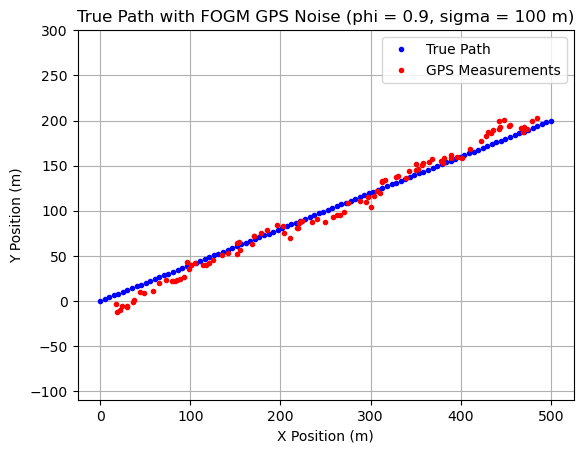

GPS X coordinate mean:  252.4232010486542
GPS Y coordinate mean:  100.21724020584207
GPS X coordinate variance:  19774.477565298017
GPS Y coordinate variance:  4034.2884094980964


In [11]:
pts = 100

time = np.linspace(0, 10, pts)
xTrue = []
yTrue = []

# True path: moving at 50 m/s in x and 20 m/s in y

xTrue = 50 * time
yTrue = 20 * time

trueData = np.vstack((xTrue, yTrue)).T


phi = 0.90 # 0.99 for GPS // This time constant and time step is in this variable. But this is the decay factor between 0 and 1.
# so it is unneeded right now. 0 means no noise correlation, 1 means full noise correlation.

# GPS Accuracy parameters -> 100 m^2 var = 10 m accuracy (error variance)
horizontalPositionAccuracy = 100
verticalPositionAccuracy = 100


# Noise variances for FOGM
noise_x = np.sqrt(horizontalPositionAccuracy * (1 - phi**2)) # from Brown and Hwang
noise_y = np.sqrt(verticalPositionAccuracy * (1 - phi**2))
    
# Initialize error arrays for FOGM
error_x = np.zeros(pts)
error_y = np.zeros(pts)

# Generate initial GPS error with Gaussian noise, zero mean, and the given variance 
error_x[0] = np.random.normal(0, np.sqrt(horizontalPositionAccuracy)) # from Brown and Hwang
error_y[0] = np.random.normal(0, np.sqrt(verticalPositionAccuracy))



# Generate FOGM GPS errors
for i in range(1, pts):
    W_x = np.random.normal(0, noise_x) # Small noise // white noise
    W_y = np.random.normal(0, noise_y)

    # FOGM update: e[k] = phi * e[k-1] + W[k]
    error_x[i] = phi * error_x[i-1] + W_x # from Brown and Hwang
    error_y[i] = phi * error_y[i-1] + W_y

xGPS = xTrue + error_x
yGPS = yTrue + error_y


plt.plot(trueData[:,0], trueData[:,1], 'b.', label='True Path')
plt.plot(xGPS, yGPS, 'r.', label='GPS Measurements')
plt.legend()
plt.xlabel('X Position (m)')
plt.ylabel('Y Position (m)')
plt.axis('equal')
plt.title(f'True Path with FOGM GPS Noise (phi = {phi}, sigma = {horizontalPositionAccuracy} m)')
plt.grid(True)
plt.show()

print("GPS X coordinate mean: ", np.mean(xGPS))
print("GPS Y coordinate mean: ", np.mean(yGPS))

print("GPS X coordinate variance: ", np.var(xGPS))
print("GPS Y coordinate variance: ", np.var(yGPS))


In [12]:
np.save('trueDataLinear.npy', trueData)
np.save('xGPSLinear.npy', xGPS)
# np.save('yGPS.npy', yGPS)